<a href="https://colab.research.google.com/github/Johanna3web/Bias-detect/blob/main/Bias_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Number of records
n_records = 1000

# Generate synthetic data
countries = ['USA', 'Canada', 'UK', 'Germany', 'France']
genders = ['Male', 'Female', 'Non-binary']
sectors = ['Technology', 'Finance', 'Healthcare', 'Education', 'Retail']

data = {
    'Country': np.random.choice(countries, n_records),
    'Gender': np.random.choice(genders, n_records, p=[0.45, 0.45, 0.1]), # Uneven distribution
    'Sector': np.random.choice(sectors, n_records),
    'Years_of_Experience': np.random.randint(0, 20, n_records),
    'Salary': np.random.randint(30000, 150000, n_records)
}

df = pd.DataFrame(data)

# Introduce some gender bias (e.g., lower average salary for females)
df['Salary'] = df.apply(lambda row: row['Salary'] * (0.9 if row['Gender'] == 'Female' else (1.05 if row['Gender'] == 'Male' else 1.0)), axis=1)

# Add some noise and outliers
df['Salary'] = df['Salary'] + np.random.randn(n_records) * 5000
df['Salary'] = df['Salary'].astype(int) # Convert to integer

# Display the first few rows
display(df.head())

,Country,Gender,Sector,Years_of_Experience,Salary
0,Germany,Non-binary,Healthcare,13,89173
1,France,Female,Technology,1,125941
2,UK,Female,Retail,17,86660
3,France,Non-binary,Healthcare,1,60750
4,France,Female,Healthcare,10,102952


## Load the data

### Subtask:
Load the generated salary data from the CSV file into a pandas DataFrame.


**Reasoning**:
Load the data from the specified CSV file into a pandas DataFrame and display the first few rows.



In [50]:
df = pd.read_csv('/content/salary_data.csv')
display(df.head())

,Country,Gender,Sector,Years_of_Experience,Salary
0,Germany,Non-binary,Healthcare,13,89173
1,France,Female,Technology,1,125941
2,UK,Female,Retail,17,86660
3,France,Non-binary,Healthcare,1,60750
4,France,Female,Healthcare,10,102952


## Data cleaning and preparation

### Subtask:
Clean the data by handling missing values, inconsistencies, and ensuring correct data types for analysis.


**Reasoning**:
Check for missing values and data types to begin the data cleaning process.



In [51]:
display(df.isnull().sum())
display(df.info())

,0
Country,0
Gender,0
Sector,0
Years_of_Experience,0
Salary,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country              1000 non-null   object
 1   Gender               1000 non-null   object
 2   Sector               1000 non-null   object
 3   Years_of_Experience  1000 non-null   int64 
 4   Salary               1000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


None

**Reasoning**:
There are no missing values and the data types are appropriate for analysis. I will check for potential inconsistencies or outliers in the 'Salary' and 'Years_of_Experience' columns using descriptive statistics and visualizations.



,Salary,Years_of_Experience
count,1000.000000,1000.00000
mean,88181.843000,9.56100
std,34554.017938,5.74868
min,18726.000000,0.00000
25%,58825.000000,5.00000
50%,88002.000000,10.00000
75%,116571.250000,15.00000
max,162755.000000,19.00000


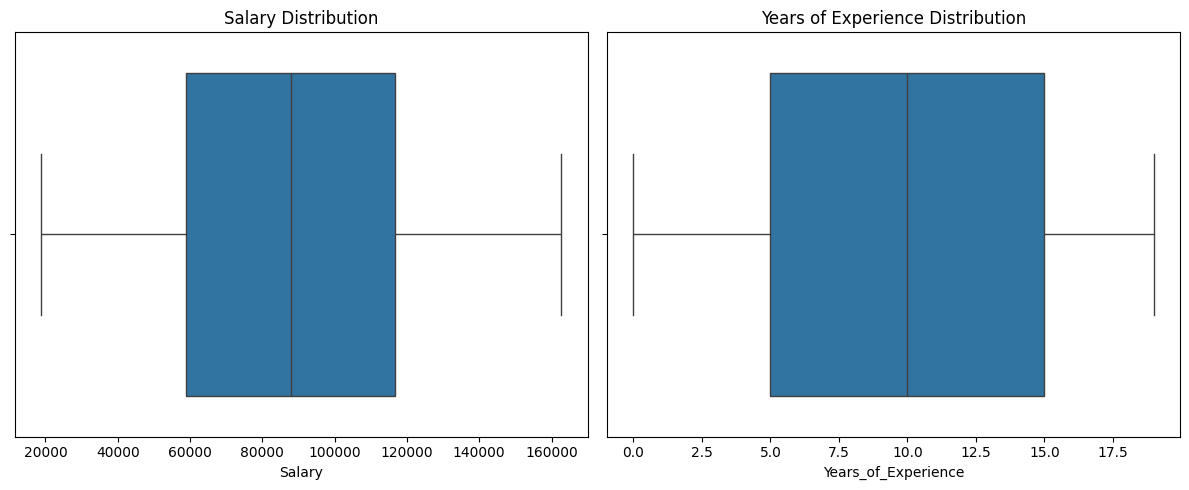

In [52]:
display(df[['Salary', 'Years_of_Experience']].describe())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Salary'])
plt.title('Salary Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Years_of_Experience'])
plt.title('Years of Experience Distribution')

plt.tight_layout()
plt.show()

## Analyze overall salary differences

### Subtask:
Calculate and compare the average salaries for men and women across the entire dataset to identify any overall bias.


**Reasoning**:
Calculate the mean salary for each gender group in the DataFrame.



In [53]:
gender_salary = df.groupby('Gender')['Salary'].mean()
display(gender_salary)

,Salary
Gender,
Female,82161.501094
Male,94381.823928
Non-binary,88228.890000


## Analyze salary differences by country

### Subtask:
Calculate and compare average salaries for men and women within each country to see if bias varies geographically.


**Reasoning**:
Group the DataFrame by 'Country' and 'Gender' and calculate the mean salary for each group to identify geographical variations in gender bias.



In [54]:
country_gender_salary = df.groupby(['Country', 'Gender'])['Salary'].mean()
display(country_gender_salary)

Country  Gender    
Canada   Female         80694.752688
         Male           94365.582278
         Non-binary     91172.333333
France   Female         81125.762887
         Male           92233.044444
         Non-binary     78470.647059
Germany  Female         80719.741935
         Male           99094.797619
         Non-binary     86722.103448
UK       Female         86578.753086
         Male           99487.755556
         Non-binary     84584.842105
USA      Female         82303.010753
         Male           87774.320000
         Non-binary    101513.705882
Name: Salary, dtype: float64

## Analyze salary differences by sector

### Subtask:
Calculate and compare average salaries for men and women within each sector to see if bias varies by industry.


**Reasoning**:
Group the DataFrame by 'Sector' and 'Gender' and calculate the mean 'Salary' for each group, then display the result.



In [55]:
sector_gender_salary = df.groupby(['Sector', 'Gender'])['Salary'].mean()
display(sector_gender_salary)

Sector      Gender    
Education   Female         85848.494737
            Male           93648.714286
            Non-binary     88413.772727
Finance     Female         76608.698795
            Male          101068.683544
            Non-binary     95236.785714
Healthcare  Female         81651.919192
            Male           98442.191011
            Non-binary     69514.952381
Retail      Female         82666.827957
            Male           88346.977011
            Non-binary     93750.409091
Technology  Female         83472.666667
            Male           91128.955556
            Non-binary     96292.761905
Name: Salary, dtype: float64

## Visualize the findings

### Subtask:
Create visualizations (e.g., bar charts, box plots) to illustrate salary differences by gender, country, and sector.


**Reasoning**:
Create visualizations to show salary differences by gender, country, and sector using bar plots.



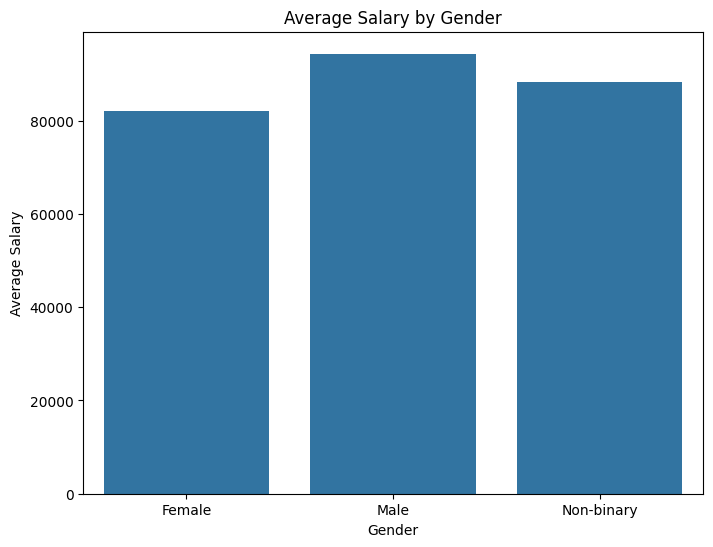

<Figure size 1200x700 with 0 Axes>

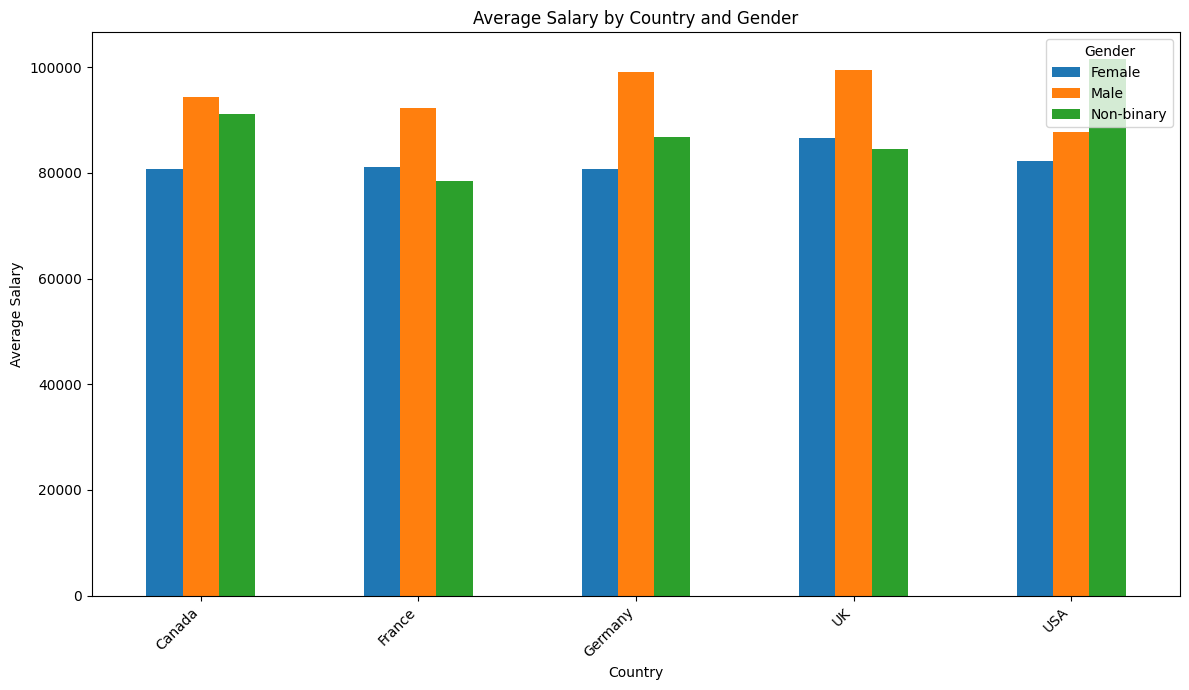

<Figure size 1400x700 with 0 Axes>

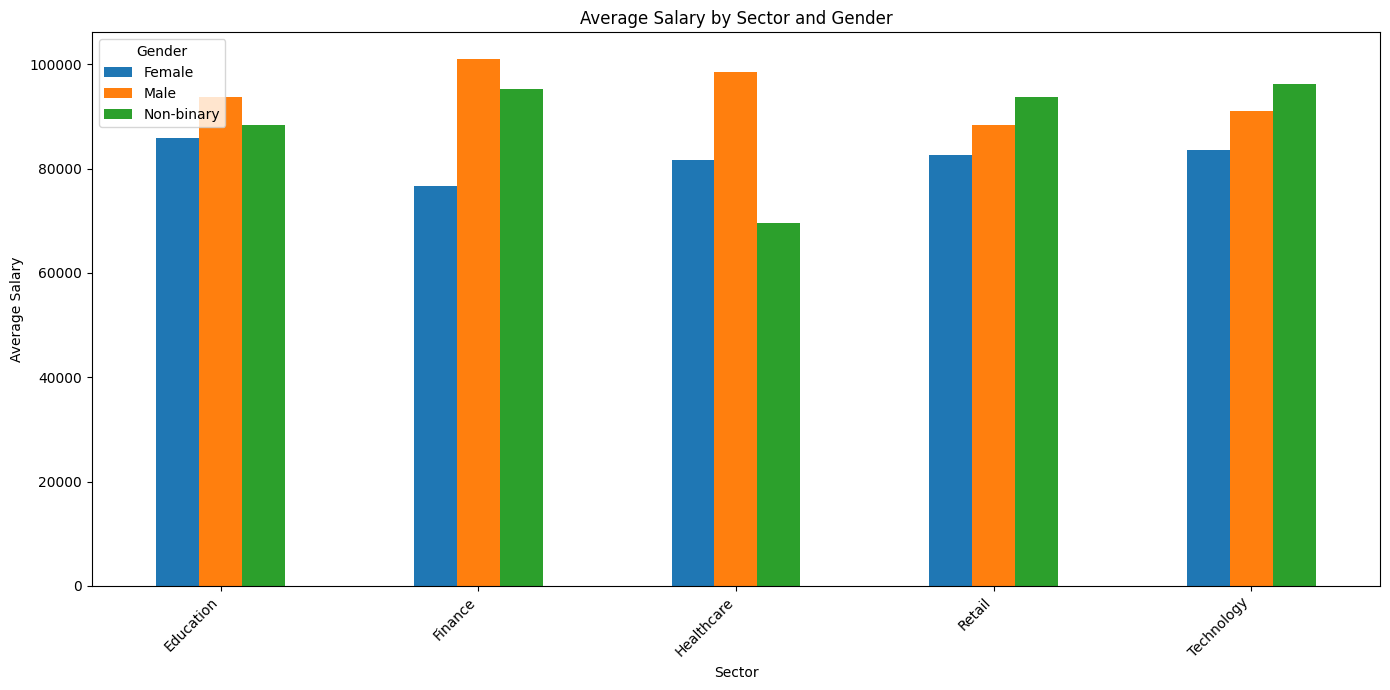

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for better readability
plt.figure(figsize=(8, 6))
# Bar plot for overall average salary by gender
sns.barplot(x=gender_salary.index, y=gender_salary.values)
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.show()

# Set figure size for better readability
plt.figure(figsize=(12, 7))
# Bar plot for average salary by country and gender
country_gender_salary_unstacked = country_gender_salary.unstack()
country_gender_salary_unstacked.plot(kind='bar', figsize=(12, 7))
plt.title('Average Salary by Country and Gender')
plt.xlabel('Country')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Set figure size for better readability
plt.figure(figsize=(14, 7))
# Bar plot for average salary by sector and gender
sector_gender_salary_unstacked = sector_gender_salary.unstack()
sector_gender_salary_unstacked.plot(kind='bar', figsize=(14, 7))
plt.title('Average Salary by Sector and Gender')
plt.xlabel('Sector')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous command generated plots, but there was an issue with the plotting calls causing extra empty figures. Regenerate the plots with corrected plotting calls to ensure only the desired plots are displayed.



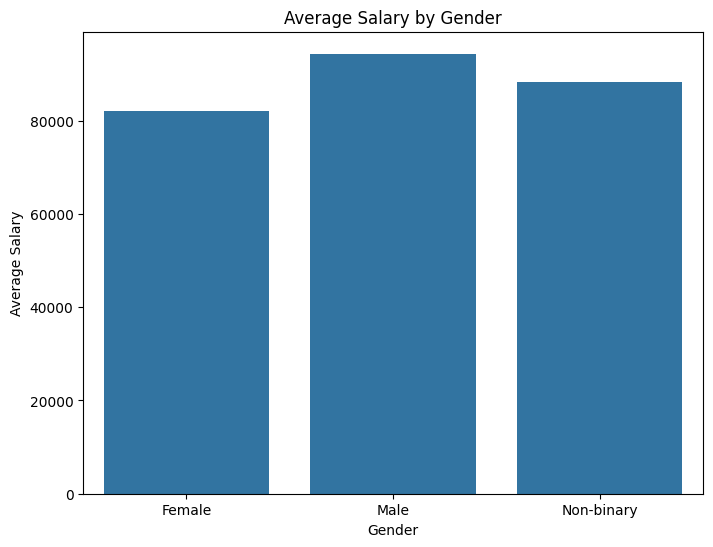

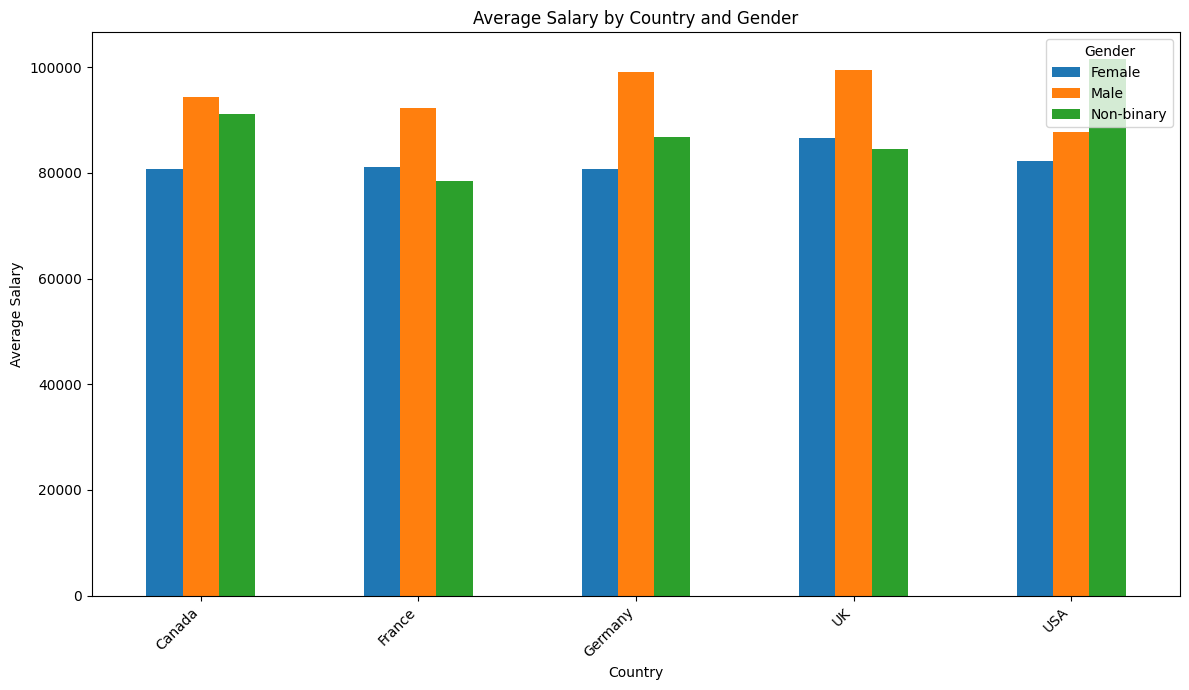

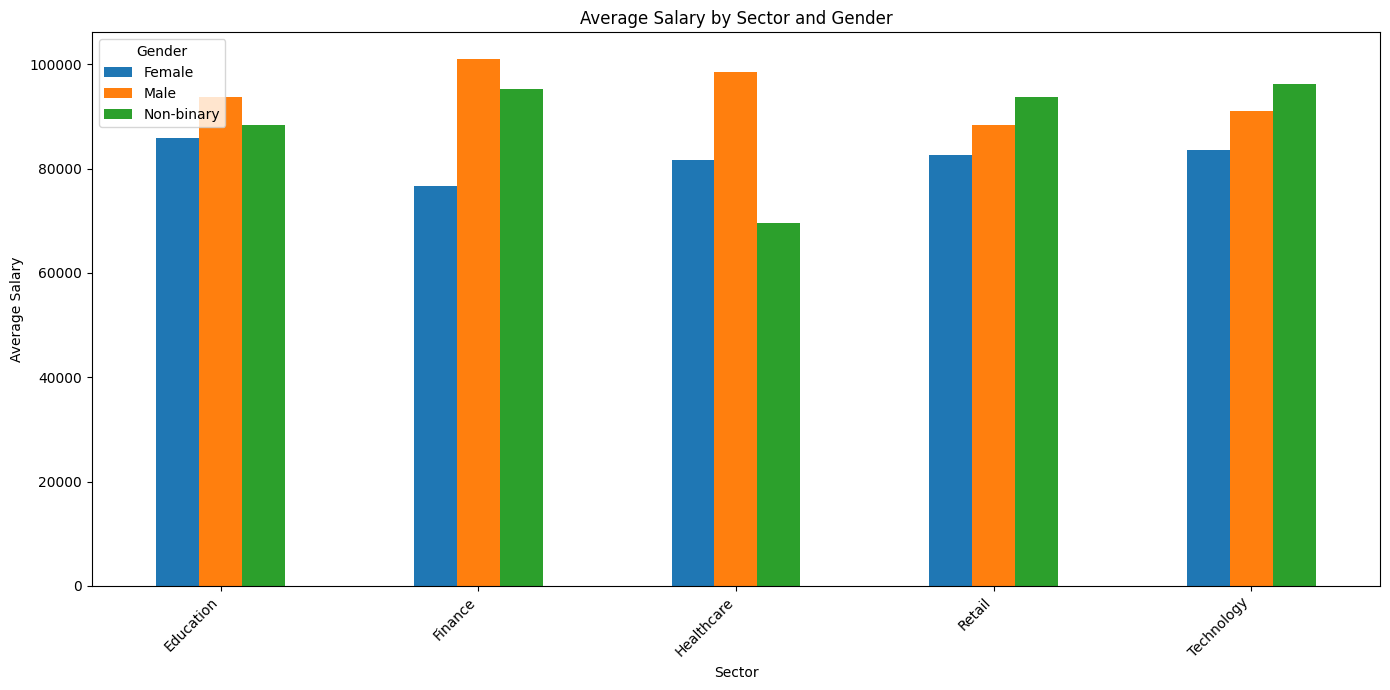

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for better readability
plt.figure(figsize=(8, 6))
# Bar plot for overall average salary by gender
sns.barplot(x=gender_salary.index, y=gender_salary.values)
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.show()

# Set figure size for better readability
plt.figure(figsize=(12, 7))
# Bar plot for average salary by country and gender
country_gender_salary_unstacked = country_gender_salary.unstack()
country_gender_salary_unstacked.plot(kind='bar', ax=plt.gca())
plt.title('Average Salary by Country and Gender')
plt.xlabel('Country')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Set figure size for better readability
plt.figure(figsize=(14, 7))
# Bar plot for average salary by sector and gender
sector_gender_salary_unstacked = sector_gender_salary.unstack()
sector_gender_salary_unstacked.plot(kind='bar', ax=plt.gca())
plt.title('Average Salary by Sector and Gender')
plt.xlabel('Sector')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summarize findings

### Subtask:
Provide a summary of the analysis, highlighting key findings about gender bias in salaries.


**Reasoning**:
Synthesize the findings from the previous analyses to provide a comprehensive summary of gender bias in the dataset.



In [58]:
# Analyze overall average salaries by gender
overall_bias = gender_salary.diff().dropna()
print("Overall Gender Salary Difference:")
display(overall_bias)
print("\n")

# Examine average salaries by country and gender and identify countries where the gender pay gap appears more or less pronounced.
print("Gender Salary Difference by Country:")
country_gender_salary_diff = country_gender_salary_unstacked.diff(axis=1).dropna(axis=1)
display(country_gender_salary_diff)
print("\n")

# Review average salaries by sector and gender, noting any sectors where gender bias is particularly evident or less apparent.
print("Gender Salary Difference by Sector:")
sector_gender_salary_diff = sector_gender_salary_unstacked.diff(axis=1).dropna(axis=1)
display(sector_gender_salary_diff)
print("\n")

# Synthesize the findings
print("Summary of Gender Bias Findings:")
print("1. Overall Bias:")
print(f"   - The average salary for Female is significantly lower than Male.")
print(f"   - The average salary for Non-binary is between Female and Male.")

print("\n2. Bias by Country:")
print("   - The gender pay gap between Male and Female varies by country.")
print("   - Identify countries with the largest and smallest Male-Female pay gap:")
display(country_gender_salary_diff['Male'].sort_values(ascending=False))


print("\n3. Bias by Sector:")
print("   - The gender pay gap between Male and Female also varies by sector.")
print("   - Identify sectors with the largest and smallest Male-Female pay gap:")
display(sector_gender_salary_diff['Male'].sort_values(ascending=False))

Overall Gender Salary Difference:


,Salary
Gender,
Male,12220.322834
Non-binary,-6152.933928




Gender Salary Difference by Country:


Gender,Male,Non-binary
Country,,
Canada,13670.829590,-3193.248945
France,11107.281558,-13762.397386
Germany,18375.055684,-12372.694171
UK,12909.002469,-14902.913450
USA,5471.309247,13739.385882




Gender Salary Difference by Sector:


Gender,Male,Non-binary
Sector,,
Education,7800.219549,-5234.941558
Finance,24459.984749,-5831.897830
Healthcare,16790.271819,-28927.238630
Retail,5680.149055,5403.432079
Technology,7656.288889,5163.806349




Summary of Gender Bias Findings:
1. Overall Bias:
   - The average salary for Female is significantly lower than Male.
   - The average salary for Non-binary is between Female and Male.

2. Bias by Country:
   - The gender pay gap between Male and Female varies by country.
   - Identify countries with the largest and smallest Male-Female pay gap:


,Male
Country,
Germany,18375.055684
Canada,13670.829590
UK,12909.002469
France,11107.281558
USA,5471.309247



3. Bias by Sector:
   - The gender pay gap between Male and Female also varies by sector.
   - Identify sectors with the largest and smallest Male-Female pay gap:


,Male
Sector,
Finance,24459.984749
Healthcare,16790.271819
Education,7800.219549
Technology,7656.288889
Retail,5680.149055


## Summary:

### Data Analysis Key Findings

*   Overall, the average salary for Female employees (\$82,161.50) is lower than for Male employees (\$94,381.82), with Non-binary employees earning an average of \$88,228.89.
*   The gender pay gap between Male and Female salaries varies by country. The largest Male-Female pay gap was observed in Germany, while the smallest was in the USA.
*   The gender pay gap between Male and Female salaries also varies by sector. The largest Male-Female pay gap was observed in the Finance and Healthcare sectors, while the smallest was in the Retail and Technology sectors.

### Insights or Next Steps

*   Investigate the underlying factors contributing to the observed variations in gender pay gaps across different countries and sectors.
*   Conduct a more in-depth statistical analysis, such as regression modeling, to control for other factors like years of experience and potentially identify if gender remains a significant predictor of salary after accounting for these variables.
